In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
id                       456548 non-null int64
week                     456548 non-null int64
center_id                456548 non-null int64
meal_id                  456548 non-null int64
checkout_price           456548 non-null float64
base_price               456548 non-null float64
emailer_for_promotion    456548 non-null int64
homepage_featured        456548 non-null int64
num_orders               456548 non-null int64
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


In [3]:
train.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
dtype: int64

In [4]:
train['num_orders'].describe()

count    456548.000000
mean        261.872760
std         395.922798
min          13.000000
25%          54.000000
50%         136.000000
75%         324.000000
max       24299.000000
Name: num_orders, dtype: float64

In [5]:

body = client_f6799ad66c264fd895b3f9a54eab8f7f.get_object(Bucket='food-donotdelete-pr-stjwyapce06k6l',Key='meal_info.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

meal_info = pd.read_csv(body)
meal_info.head()


NameError: name 'client_f6799ad66c264fd895b3f9a54eab8f7f' is not defined

In [6]:

body = client_f6799ad66c264fd895b3f9a54eab8f7f.get_object(Bucket='food-donotdelete-pr-stjwyapce06k6l',Key='fulfilment_center_info.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

center_info = pd.read_csv(body)
center_info.head()


NameError: name 'client_f6799ad66c264fd895b3f9a54eab8f7f' is not defined

In [7]:
trainfinal = pd.merge(train, meal_info, on="meal_id", how="outer")
trainfinal = pd.merge(trainfinal, center_info, on="center_id", how="outer")
trainfinal.head()

NameError: name 'meal_info' is not defined

In [10]:
trainfinal = trainfinal.drop(['center_id', 'meal_id'], axis=1)
trainfinal.head()

id  week  checkout_price  base_price  emailer_for_promotion  \
0  1379560     1          136.83      152.29                      0   
1  1018704     2          135.83      152.29                      0   
2  1196273     3          132.92      133.92                      0   
3  1116527     4          135.86      134.86                      0   
4  1343872     5          146.50      147.50                      0   

   homepage_featured  num_orders   category cuisine  city_code  region_code  \
0                  0         177  Beverages    Thai        647           56   
1                  0         323  Beverages    Thai        647           56   
2                  0          96  Beverages    Thai        647           56   
3                  0         163  Beverages    Thai        647           56   
4                  0         215  Beverages    Thai        647           56   

  center_type  op_area  
0      TYPE_C      2.0  
1      TYPE_C      2.0  
2      TYPE_C      2.0  
3      TYPE_C      2.0  
4      TYPE_C      2.0

In [11]:
cols = trainfinal.columns.tolist()
print(cols)

['id', 'week', 'checkout_price', 'base_price', 'emailer_for_promotion', 'homepage_featured', 'num_orders', 'category', 'cuisine', 'city_code', 'region_code', 'center_type', 'op_area']


In [12]:
cols = cols[:2] + cols[9:] + cols[7:9] + cols[2:7]
print(cols)

['id', 'week', 'city_code', 'region_code', 'center_type', 'op_area', 'category', 'cuisine', 'checkout_price', 'base_price', 'emailer_for_promotion', 'homepage_featured', 'num_orders']


In [13]:
trainfinal = trainfinal[cols]

In [14]:
trainfinal.dtypes

id                         int64
week                       int64
city_code                  int64
region_code                int64
center_type               object
op_area                  float64
category                  object
cuisine                   object
checkout_price           float64
base_price               float64
emailer_for_promotion      int64
homepage_featured          int64
num_orders                 int64
dtype: object

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
lb1 = LabelEncoder()
trainfinal['center_type'] = lb1.fit_transform(trainfinal['center_type'])

lb2 = LabelEncoder()
trainfinal['category'] = lb1.fit_transform(trainfinal['category'])

lb3 = LabelEncoder()
trainfinal['cuisine'] = lb1.fit_transform(trainfinal['cuisine'])

In [17]:
trainfinal.head()

id  week  city_code  region_code  center_type  op_area  category  \
0  1379560     1        647           56            2      2.0         0   
1  1018704     2        647           56            2      2.0         0   
2  1196273     3        647           56            2      2.0         0   
3  1116527     4        647           56            2      2.0         0   
4  1343872     5        647           56            2      2.0         0   

   cuisine  checkout_price  base_price  emailer_for_promotion  \
0        3          136.83      152.29                      0   
1        3          135.83      152.29                      0   
2        3          132.92      133.92                      0   
3        3          135.86      134.86                      0   
4        3          146.50      147.50                      0   

   homepage_featured  num_orders  
0                  0         177  
1                  0         323  
2                  0          96  
3                  0         163  
4                  0         215

In [18]:
trainfinal.shape

(456548, 13)

/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'num_orders Distribution')

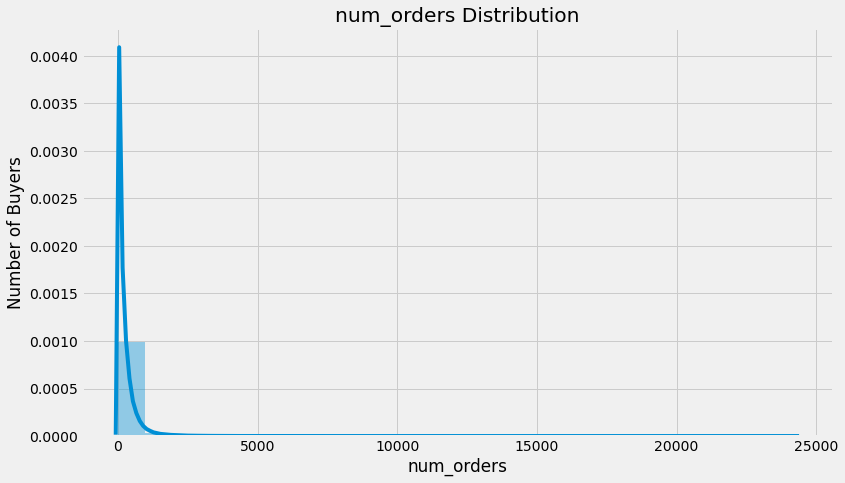

In [19]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
sns.distplot(trainfinal.num_orders, bins = 25)
plt.xlabel("num_orders")
plt.ylabel("Number of Buyers")
plt.title("num_orders Distribution")

In [20]:
trainfinal2 = trainfinal.drop(['id'], axis=1)
correlation = trainfinal2.corr(method='pearson')
columns = correlation.nlargest(8, 'num_orders').index
columns

Index(['num_orders', 'homepage_featured', 'emailer_for_promotion', 'op_area',
       'cuisine', 'city_code', 'region_code', 'category'],
      dtype='object')

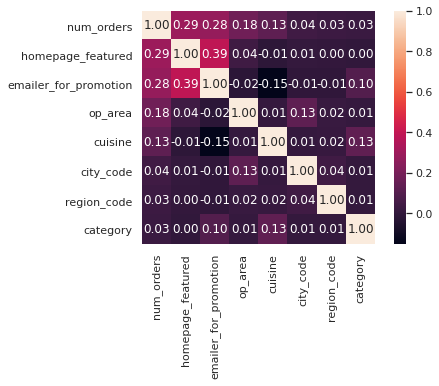

In [21]:
correlation_map = np.corrcoef(trainfinal2[columns].values.T)
sns.set(font_scale=1.0)
heatmap = sns.heatmap(correlation_map, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)

plt.show()

In [22]:
features = columns.drop(['num_orders'])
trainfinal3 = trainfinal[features]
X = trainfinal3.values
y = trainfinal['num_orders'].values

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25)

In [23]:
trainfinal3.head()

homepage_featured  emailer_for_promotion  op_area  cuisine  city_code  \
0                  0                      0      2.0        3        647   
1                  0                      0      2.0        3        647   
2                  0                      0      2.0        3        647   
3                  0                      0      2.0        3        647   
4                  0                      0      2.0        3        647   

   region_code  category  
0           56         0  
1           56         0  
2           56         0  
3           56         0  
4           56         0

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [25]:
from xgboost import XGBRegressor
XG = XGBRegressor()
XG.fit(X_train, y_train)
y_pred = XG.predict(X_val)
y_pred[y_pred<0] = 0
from sklearn import metrics
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(y_val, y_pred)))

RMSLE: 70.83462268671528


In [26]:
LR = LinearRegression()
LR.fit(X_train, y_train)
y_pred = LR.predict(X_val)
y_pred[y_pred<0] = 0
from sklearn import metrics
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(y_val, y_pred)))

RMSLE: 129.5341934240543


In [27]:
L = Lasso()
L.fit(X_train, y_train)
y_pred = L.predict(X_val)
y_pred[y_pred<0] = 0
from sklearn import metrics
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(y_val, y_pred)))

RMSLE: 129.25233188608806


In [28]:
EN = ElasticNet()
EN.fit(X_train, y_train)
y_pred = EN.predict(X_val)
y_pred[y_pred<0] = 0
from sklearn import metrics
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(y_val, y_pred)))

RMSLE: 131.16949192712605


In [29]:
DT = DecisionTreeRegressor()
DT.fit(X_train, y_train)
y_pred = DT.predict(X_val)
y_pred[y_pred<0] = 0
from sklearn import metrics
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(y_val, y_pred)))

RMSLE: 62.85318210383417


In [30]:
DT.get_params

<bound method BaseEstimator.get_params of DecisionTreeRegressor()>

In [31]:
KNN = KNeighborsRegressor()
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_val)
y_pred[y_pred<0] = 0
from sklearn import metrics
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(y_val, y_pred)))

RMSLE: 67.16783539919223


In [32]:
GB = GradientBoostingRegressor()
GB.fit(X_train, y_train)
y_pred = GB.predict(X_val)
y_pred[y_pred<0] = 0
from sklearn import metrics
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(y_val, y_pred)))

RMSLE: 97.69866198206351


In [33]:
testfinal = pd.merge(test, meal_info, on="meal_id", how="outer")
testfinal = pd.merge(testfinal, center_info, on="center_id", how="outer")
testfinal = testfinal.drop(['meal_id', 'center_id'], axis=1)

tcols = testfinal.columns.tolist()
print(tcols)

['id', 'week', 'checkout_price', 'base_price', 'emailer_for_promotion', 'homepage_featured', 'category', 'cuisine', 'city_code', 'region_code', 'center_type', 'op_area']


In [34]:
tcols = tcols[:2] + tcols[8:] + tcols[6:8] + tcols[2:6]
testfinal = testfinal[tcols]

lb1 = LabelEncoder()
testfinal['center_type'] = lb1.fit_transform(testfinal['center_type'])

lb2 = LabelEncoder()
testfinal['category'] = lb1.fit_transform(testfinal['category'])

lb3 = LabelEncoder()
testfinal['cuisine'] = lb1.fit_transform(testfinal['cuisine'])

testfinal.head()

id  week  city_code  region_code  center_type  op_area  category  \
0  1028232   146        647           56            2      2.0         0   
1  1262649   147        647           56            2      2.0         0   
2  1453211   149        647           56            2      2.0         0   
3  1262599   150        647           56            2      2.0         0   
4  1495848   151        647           56            2      2.0         0   

   cuisine  checkout_price  base_price  emailer_for_promotion  \
0        3          158.11      159.11                      0   
1        3          159.11      159.11                      0   
2        3          157.14      158.14                      0   
3        3          159.14      157.14                      0   
4        3          160.11      159.11                      0   

   homepage_featured  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0

In [35]:
X_test = testfinal[features].values

In [36]:
features

Index(['homepage_featured', 'emailer_for_promotion', 'op_area', 'cuisine',
       'city_code', 'region_code', 'category'],
      dtype='object')

In [37]:
pred = DT.predict(X_test)
pred[pred<0] = 0
submit = pd.DataFrame({
    'id' : testfinal['id'],
    'num_orders' : pred
})

In [38]:
submit.to_csv("submission.csv", index=False)

In [39]:
submit.describe()

id    num_orders
count  3.257300e+04  32573.000000
mean   1.248476e+06    262.640344
std    1.441580e+05    362.733744
min    1.000085e+06     14.250000
25%    1.123969e+06     64.493671
50%    1.247296e+06    147.919847
75%    1.372971e+06    319.320000
max    1.499996e+06   5482.500000

In [40]:
#pickle.dump(DT,open('fdemand.pkl','wb')) 

In [41]:
pwd


'/home/wsuser/work'

In [42]:
!pip install ibm_watson_machine_learning


In [43]:
from ibm_watson_machine_learning import APIClient
wml_credentials={"url":"https://us-south.ml.cloud.ibm.com","apikey":"QIZb5MLZY-bqVVWxx1Jf5gqGSHJs9JI12pXkocNyZXJq"}
client=APIClient(wml_credentials)

In [44]:
client

In [45]:
def space_name(client, space_name):
    space=client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']['name']==space_name)['metadata']['id'])

In [46]:
space_uid= space_name(client,'food_deploy')
print(space_uid)

b4276b6d-2077-4ee5-a45b-eb02c190c6c1


In [47]:
client.set.default_space(space_uid)

'SUCCESS'

In [48]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
scikit-learn_0.22-py3.6        154010fa-5b3b-4ac1-82af-4d5ee5abbc85  base
default_r3.6                   1b70aec3-ab34-4b87-8aa0-a4a3c8296a36  base
pytorch-onnx_1.3-py3.6         1bc6029

In [49]:
MODEL_NAME = 'FoodModel'
DEPLOYMENT_NAME = 'food_deploy'
Food_MODEL = DT

In [50]:
software_spec=client.software_specifications.get_uid_by_name("default_py3.8")

In [51]:
software_spec

'ab9e1b80-f2ce-592c-a7d2-4f2344f77194'

In [52]:
# Set Python Version
software_spec_uid = client.software_specifications.get_id_by_name('default_py3.8')

# Setup model meta
model_props = {
    client.repository.ModelMetaNames.NAME: MODEL_NAME, 
    client.repository.ModelMetaNames.TYPE: 'scikit-learn_0.23', 
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid 
}



In [53]:
#Save model
model_details = client.repository.store_model(
    model=Food_MODEL, 
    meta_props=model_props, 
    training_data=X_train, 
    training_target=y_train
)

In [54]:
model_details

{'entity': {'label_column': 'l1',
  'software_spec': {'id': 'ab9e1b80-f2ce-592c-a7d2-4f2344f77194',
   'name': 'default_py3.8'},
  'training_data_references': [{'connection': {'access_key_id': 'not_applicable',
     'endpoint_url': 'not_applicable',
     'secret_access_key': 'not_applicable'},
    'id': '1',
    'location': {},
    'schema': {'fields': [{'name': 'f0', 'type': 'float'},
      {'name': 'f1', 'type': 'float'},
      {'name': 'f2', 'type': 'float'},
      {'name': 'f3', 'type': 'float'},
      {'name': 'f4', 'type': 'float'},
      {'name': 'f5', 'type': 'float'},
      {'name': 'f6', 'type': 'float'}],
     'id': '1',
     'type': 'ndarray'},
    'type': 's3'}],
  'type': 'scikit-learn_0.23'},
 'metadata': {'created_at': '2021-11-25T06:43:09.915Z',
  'id': '86696480-0a6c-4284-a328-b19c4ba8b4cc',
  'modified_at': '2021-11-25T06:43:12.712Z',
  'name': 'FoodModel',
  'owner': 'IBMid-66600165BS',
  'resource_key': 'c72f11ae-4466-4327-b004-fab16677fa11',
  'space_id': 'b4276b6

In [55]:
model_uid = client.repository.get_model_uid(model_details); model_uid

'86696480-0a6c-4284-a328-b19c4ba8b4cc'

In [56]:
client.connections.list_datasource_types()

-------------------------  ------------------------------------  --------  ------
NAME                       DATASOURCE_ID                         TYPE      STATUS
informix                   029e5d1c-ba73-4b09-b742-14c3a39b6cf9  database  active
postgresql-ibmcloud        048ed1bf-516c-46f0-ae90-fa3349d8bc1c  database  active
googlecloudstorage         05b7f0ea-6ae4-45e2-a455-cc280f110825  file      active
impala                     05c58384-862e-4597-b19a-c71ea7e760bc  database  active
salesforce                 06847b16-07b4-4415-a924-c63d11a17aa1  database  active
datastax-ibmcloud          0bd5946b-6fcb-4253-bf76-48b362d24a89  database  active
cosmos                     0c431748-2572-11ea-978f-2e728ce88125  file      active
odbc-datastage             0ca92c3d-0e46-3b42-a573-77958d53c9be  database  active
mysql-compose              0cd4b64c-b485-47ed-a8c4-329c25412de3  database  active
hive                       0fd83fe5-8995-4e2e-a1be-679bb8813a6d  database  active
cognos-analytics

In [57]:
# Set meta
deployment_props = {
    client.deployments.ConfigurationMetaNames.NAME:DEPLOYMENT_NAME, 
    client.deployments.ConfigurationMetaNames.ONLINE: {}
}



In [58]:
# Deploy
deployment = client.deployments.create(
    artifact_uid=model_uid, 
    meta_props=deployment_props 
)



#######################################################################################

Synchronous deployment creation for uid: '86696480-0a6c-4284-a328-b19c4ba8b4cc' started

#######################################################################################


initializing
Note: online_url is deprecated and will be removed in a future release. Use serving_urls instead.

ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='08405343-1091-4c04-8997-103f6ed74efa'
------------------------------------------------------------------------------------------------




# Score Against Deployed Model

In [59]:
deployment_uid = client.deployments.get_uid(deployment)
payload = {"input_data":
           [
               {"fields":X_test.tolist(), "values":X_test.tolist()}
           ]
          }
result = client.deployments.score(deployment_uid, payload); result

{'predictions': [{'fields': ['prediction'],
   'values': [[205.36858974358975],
    [205.36858974358975],
    [205.36858974358975],
    [205.36858974358975],
    [205.36858974358975],
    [205.36858974358975],
    [205.36858974358975],
    [205.36858974358975],
    [205.36858974358975],
    [205.36858974358975],
    [205.36858974358975],
    [205.36858974358975],
    [205.36858974358975],
    [205.36858974358975],
    [205.36858974358975],
    [205.36858974358975],
    [205.36858974358975],
    [205.36858974358975],
    [205.36858974358975],
    [205.36858974358975],
    [205.36858974358975],
    [205.36858974358975],
    [40.054263565891475],
    [40.054263565891475],
    [40.054263565891475],
    [40.054263565891475],
    [40.054263565891475],
    [40.054263565891475],
    [40.054263565891475],
    [40.054263565891475],
    [40.054263565891475],
    [40.054263565891475],
    [40.054263565891475],
    [40.054263565891475],
    [40.054263565891475],
    [40.054263565891475],
    [40.05

In [60]:
payload

{'input_data': [{'fields': [[0.0, 0.0, 2.0, 3.0, 647.0, 56.0, 0.0],
    [0.0, 0.0, 2.0, 3.0, 647.0, 56.0, 0.0],
    [0.0, 0.0, 2.0, 3.0, 647.0, 56.0, 0.0],
    [0.0, 0.0, 2.0, 3.0, 647.0, 56.0, 0.0],
    [0.0, 0.0, 2.0, 3.0, 647.0, 56.0, 0.0],
    [0.0, 0.0, 2.0, 3.0, 647.0, 56.0, 0.0],
    [0.0, 0.0, 2.0, 3.0, 647.0, 56.0, 0.0],
    [0.0, 0.0, 2.0, 3.0, 647.0, 56.0, 0.0],
    [0.0, 0.0, 2.0, 3.0, 647.0, 56.0, 0.0],
    [0.0, 0.0, 2.0, 3.0, 647.0, 56.0, 0.0],
    [0.0, 0.0, 2.0, 3.0, 647.0, 56.0, 0.0],
    [0.0, 0.0, 2.0, 3.0, 647.0, 56.0, 0.0],
    [0.0, 0.0, 2.0, 3.0, 647.0, 56.0, 0.0],
    [0.0, 0.0, 2.0, 3.0, 647.0, 56.0, 0.0],
    [0.0, 0.0, 2.0, 3.0, 647.0, 56.0, 0.0],
    [0.0, 0.0, 2.0, 3.0, 647.0, 56.0, 0.0],
    [0.0, 0.0, 2.0, 3.0, 647.0, 56.0, 0.0],
    [0.0, 0.0, 2.0, 3.0, 647.0, 56.0, 0.0],
    [0.0, 0.0, 2.0, 3.0, 647.0, 56.0, 0.0],
    [0.0, 0.0, 2.0, 3.0, 647.0, 56.0, 0.0],
    [0.0, 0.0, 2.0, 3.0, 647.0, 56.0, 0.0],
    [0.0, 0.0, 2.0, 3.0, 647.0, 56.0, 0.0],
    [0.0